#### Loading libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pylab as plt

#### Load data: position and tangent angles and magnitudes predictions

In [2]:
ai_vgg19, ai_inception, ai_xception = dict(), dict(), dict()
for i in range(2, 7):
    ai_vgg19[i] = np.load(os.path.join(os.getcwd(), 'predictions', 'angles_inner_vgg19_'+str(i)+'.npy'))
    ai_inception[i] = np.load(os.path.join(os.getcwd(), 'predictions', 
                                        'angles_inner_InceptionResNetV2_'+str(i)+'.npy'))
    ai_xception[i] = np.load(os.path.join(os.getcwd(), 'predictions', 'angles_inner_xception_'+str(i)+'.npy'))
at_vgg19, at_inception, at_xception = dict(), dict(), dict()
for i in range(2, 7):
    at_vgg19[i] = np.load(os.path.join(os.getcwd(), 'predictions', 'angles_tang_vgg19_'+str(i)+'.npy'))
    at_inception[i] = np.load(os.path.join(os.getcwd(), 'predictions', 
                                        'angles_tang_InceptionResNetV2_'+str(i)+'.npy'))
    at_xception[i] = np.load(os.path.join(os.getcwd(), 'predictions', 'angles_tang_xception_'+str(i)+'.npy'))
m_vgg19, m_inception, m_xception = dict(), dict(), dict()
for i in range(2, 7):
    m_vgg19[i] = np.load(os.path.join(os.getcwd(), 'predictions', 'magnitudes_vgg19_'+str(i)+'.npy'))
    m_inception[i] = np.load(os.path.join(os.getcwd(), 'predictions', 
                                        'magnitudes_inception_'+str(i)+'.npy'))
    m_xception[i] = np.load(os.path.join(os.getcwd(), 'predictions', 'magnitudes_xception_'+str(i)+'.npy'))

#### Test on true labels

In [70]:
ai = np.load('/home/renat_sergazinov/python-git-workspace/PhotoForceReconML/labels/test/6/angles_inner.npy')
at = np.load('/home/renat_sergazinov/python-git-workspace/PhotoForceReconML/labels/test/6/angles_tang.npy')
m = np.load('/home/renat_sergazinov/python-git-workspace/PhotoForceReconML/labels/test/6/mags.npy')

In [78]:
x = np.cos(ai) * np.cos(at) * m
y = np.sin(ai) * np.cos(at) * m
res = np.sqrt(np.sum(x, axis = 1) ** 2 + np.sum(y, axis = 1) ** 2) / np.mean(m, axis = 1)

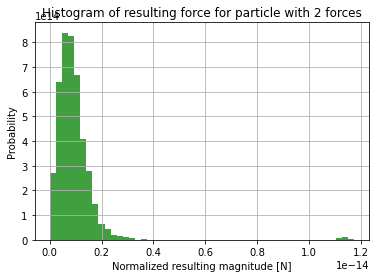

In [79]:
n, bins, patches = plt.hist(res, 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Normalized resulting magnitude [N]')
plt.ylabel('Probability')
plt.title('Histogram of resulting force for particle with 2 forces')
plt.grid(True)
plt.show()

#### Calculate resultant force magnitude

In [3]:
# Best model ensemble -- normalized
x, y, res = dict(), dict(), dict()
for i in range(2, 7):
    x[i] = np.cos(ai_vgg19[i] + np.pi) * np.cos(at_xception[i]) * m_inception[i]
    y[i] = np.sin(ai_vgg19[i] + np.pi) * np.cos(at_xception[i]) * m_inception[i]
    res[i] = np.sqrt(np.sum(x[i], axis = 1) ** 2 + np.sum(y[i], axis = 1) ** 2) / np.mean(m_inception[i], axis = 1)

In [4]:
# Best model ensemble -- non-normalized
x, y, res_non = dict(), dict(), dict()
for i in range(2, 7):
    x[i] = np.cos(ai_vgg19[i] + np.pi) * np.cos(at_xception[i]) * m_inception[i]
    y[i] = np.sin(ai_vgg19[i] + np.pi) * np.cos(at_xception[i]) * m_inception[i]
    res_non[i] = np.sqrt(np.sum(x[i], axis = 1) ** 2 + np.sum(y[i], axis = 1) ** 2)

In [5]:
# Compute mean per magnitude
means, means_non = list(), list()
means.append
for i in range(2, 7):
    means.append(np.mean(res[i]))
    means_non.append(np.mean(res_non[i]))

In [6]:
# Plot
table_non = pd.DataFrame()
table_non["M"] = range(2, 7)
table_non["Mean magnitude [N]"] = means_non

table_norm = pd.DataFrame()
table_norm["M"] = range(2, 7)
table_norm["Mean relative magnitude"] = means

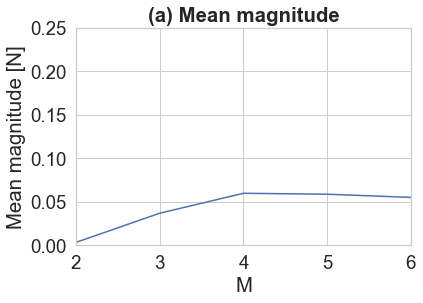

In [18]:
sns.set_theme(style="whitegrid", font_scale=1.7)
s = sns.lineplot(data=table_non, x="M", y="Mean magnitude [N]")
s.set(xlim = (2,6))
s.set(ylim = (0, 0.25))
s.set(xticks = np.arange(2,7,1))
s.set_title('(a) Mean magnitude', fontdict= {'fontweight':'bold'})
plt.savefig(os.path.join(os.getcwd(), 'plots', 'newtons_magnitude_error.pdf'), dpi=300, bbox_inches='tight')

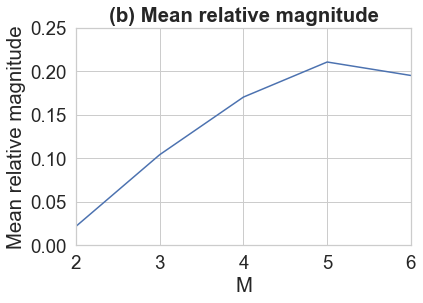

In [19]:
sns.set_theme(style="whitegrid", font_scale=1.7)
s = sns.lineplot(data=table_norm, x="M", y="Mean relative magnitude")
s.set(xlim = (2,6))
s.set(xticks = np.arange(2,7,1))
s.set(ylim = (0, 0.25))
s.set_title('(b) Mean relative magnitude', fontdict= {'fontweight':'bold'})
plt.savefig(os.path.join(os.getcwd(), 'plots', 'newtons_relative_magnitude_error.pdf'), dpi=300, bbox_inches='tight')